In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('D:/Orange/Episafe_local/episafe-data/generated_data.csv')
labels = pd.read_csv('D:/Orange/Episafe_local/episafe-data/labels/1869_066_labels.csv')

In [6]:
labels

,Unnamed: 0,filename,label
0,0,1869/066/UTC-2020_02_02-01_20_00.parquet,0
1,1,1869/066/UTC-2020_02_02-01_30_00.parquet,0
2,2,1869/066/UTC-2020_02_02-01_40_00.parquet,0
3,3,1869/066/UTC-2020_02_02-01_50_00.parquet,0
4,4,1869/066/UTC-2020_02_02-02_00_00.parquet,0
...,...,...,...
141,141,1869/066/UTC-2020_02_03-00_50_00.parquet,1
142,142,1869/066/UTC-2020_02_03-01_00_00.parquet,1
143,143,1869/066/UTC-2020_02_03-01_10_00.parquet,1
144,144,1869/066/UTC-2020_02_03-01_20_00.parquet,1


In [4]:
data

,utc_timestamp,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp,folder,client_id,date,time_slot,label
0,1.584751e+09,12.287026,21.003774,57.995350,61.892074,-33.161649,0.122965,71.980037,32.889931,114,1869,2020_03_21,00_40_00,0
1,1.584751e+09,12.535225,21.003774,57.995350,61.941714,-33.208873,0.122965,71.981301,32.889931,114,1869,2020_03_21,00_40_00,0
2,1.584751e+09,12.783424,21.003774,57.995350,61.991353,-32.878305,0.122965,71.981301,32.889931,114,1869,2020_03_21,00_40_00,0
3,1.584751e+09,13.001839,21.003774,57.995350,62.036029,-32.453290,0.122965,71.981301,32.889931,114,1869,2020_03_21,00_40_00,0
4,1.584751e+09,13.001839,21.003774,57.995350,62.036029,-31.744931,0.122965,71.982565,32.889931,114,1869,2020_03_21,00_40_00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534395,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-120.856480,15.840154,71.292309,35.549927,114,1869,2020_03_21,06_00_00,0
2534396,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-126.334455,15.839525,71.292309,35.549927,114,1869,2020_03_21,06_00_00,0
2534397,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-131.859654,15.838896,71.293573,35.549927,114,1869,2020_03_21,06_00_00,0
2534398,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-137.007062,15.838581,71.293573,35.549927,114,1869,2020_03_21,06_00_00,0


In [5]:
data.describe()

,utc_timestamp,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp,folder,client_id,label
count,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2534400.0,2534400.0,2534400.0
mean,1.584761e+09,-3.542516e+00,-1.801540e+01,2.128438e+01,6.260613e+01,-1.270002e-02,2.395419e+00,7.268649e+01,3.403360e+01,114.0,1869.0,0.0
std,5.715769e+03,4.028597e+01,2.613772e+01,3.092859e+01,2.675374e+00,6.564692e+01,5.234761e+00,5.747592e+00,7.390353e-01,0.0,0.0,0.0
min,1.584751e+09,-1.279950e+02,-1.279950e+02,-1.279950e+02,6.196223e+00,-1.336117e+03,1.572442e-03,5.562122e+01,3.265997e+01,114.0,1869.0,0.0
25%,1.584756e+09,-4.899827e+01,-4.099633e+01,-8.998518e+00,6.120208e+01,-1.965561e+01,2.613399e-01,6.918994e+01,3.346998e+01,114.0,1869.0,0.0
50%,1.584761e+09,9.000872e+00,-1.799821e+01,2.300426e+01,6.199632e+01,2.539639e+00,2.858700e-01,7.178914e+01,3.388994e+01,114.0,1869.0,0.0
75%,1.584766e+09,3.291733e+01,3.004384e+00,5.299662e+01,6.415068e+01,2.100419e+01,3.682660e-01,7.482071e+01,3.449265e+01,114.0,1869.0,0.0
max,1.584771e+09,1.261458e+02,1.269996e+02,1.245574e+02,1.840904e+02,1.198533e+03,2.061000e+01,1.087292e+02,3.592993e+01,114.0,1869.0,0.0


In [6]:
grouped = data.groupby('time_slot').mean()

In [7]:
grouped.shape

(33, 13)

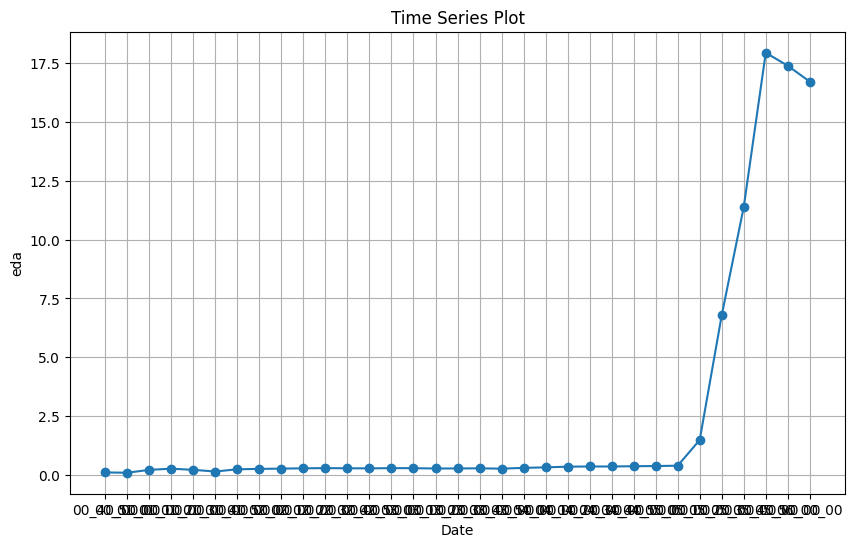

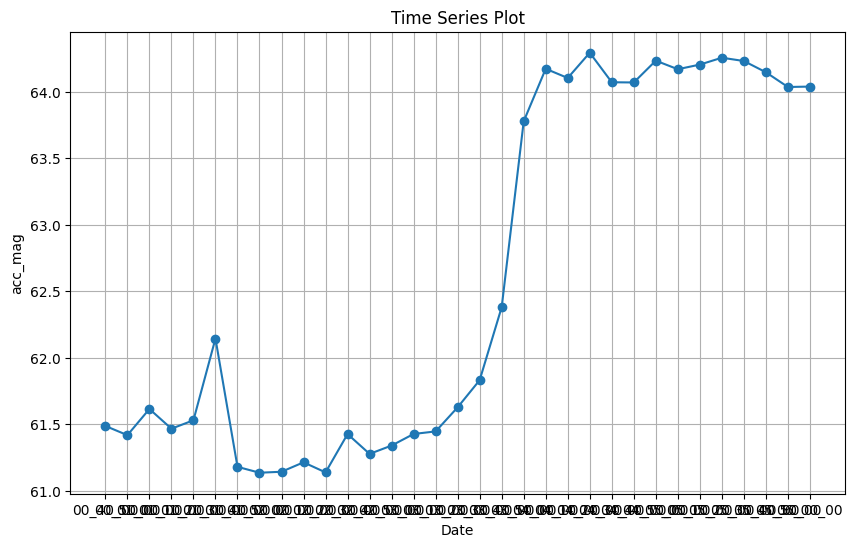

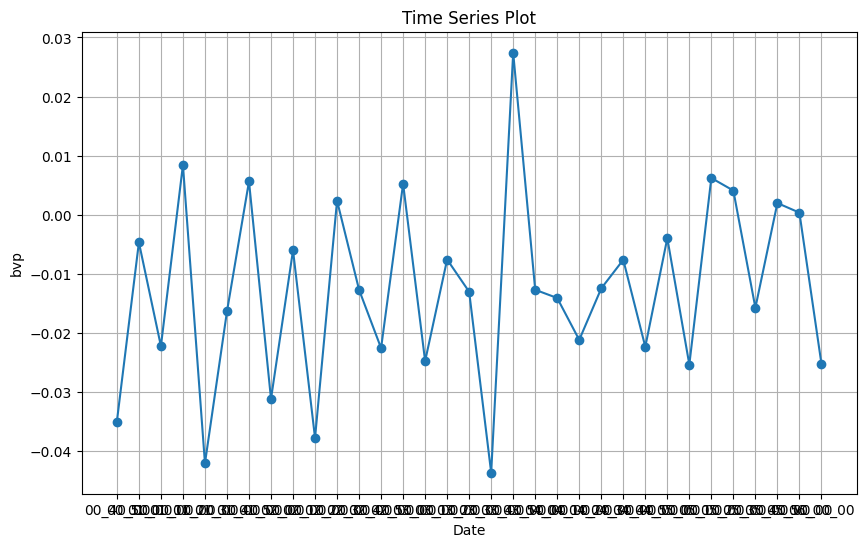

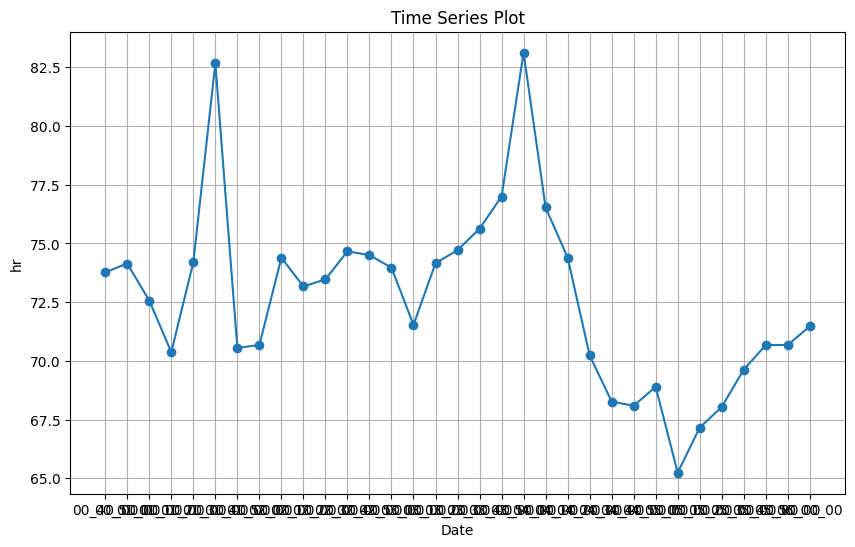

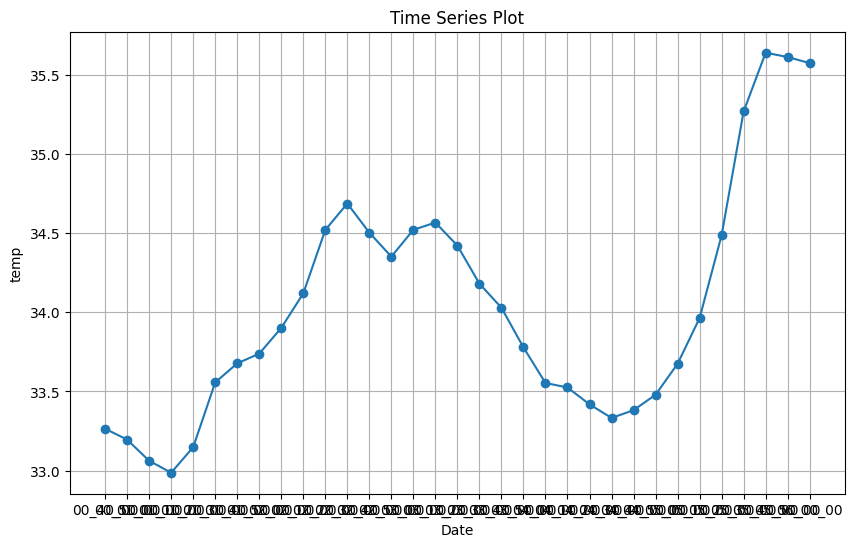

In [8]:
features_to_plot = ['eda','acc_mag','bvp','hr','temp']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot the time series data
    plt.plot(grouped.index, grouped[feature], marker='o', linestyle='-')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title('Time Series Plot')

    # Show the grid
    plt.grid(True)

    # Show the plot
    plt.show()


In [9]:
correlation_matrix = grouped.corr()

In [11]:
grouped

,utc_timestamp,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp,folder,client_id,date,label
time_slot,,,,,,,,,,,,,
00_40_00,1.584751e+09,15.121264,-2.868406,53.812461,61.487138,-0.035021,0.102029,73.779066,33.264653,114.0,1869.0,inf,0.0
00_50_00,1.584752e+09,40.059564,-2.493784,34.250875,61.418018,-0.004692,0.089624,74.143988,33.195631,114.0,1869.0,inf,0.0
01_00_00,1.584753e+09,30.896300,13.696810,43.559397,61.614707,-0.022256,0.211402,72.566141,33.062079,114.0,1869.0,inf,0.0
01_10_00,1.584753e+09,45.704924,14.033294,19.799131,61.466624,0.008411,0.261657,70.374575,32.986882,114.0,1869.0,inf,0.0
01_20_00,1.584754e+09,38.057903,3.898167,36.075792,61.529757,-0.042089,0.212133,74.202839,33.148299,114.0,1869.0,inf,0.0
01_30_00,1.584754e+09,28.864649,-4.441510,32.104642,62.144011,-0.016390,0.140693,82.672528,33.556992,114.0,1869.0,inf,0.0
01_40_00,1.584755e+09,31.222486,1.750818,52.802986,61.179966,0.005626,0.236288,70.552700,33.677276,114.0,1869.0,inf,0.0
01_50_00,1.584756e+09,37.420172,3.383506,48.754682,61.135768,-0.031189,0.252404,70.678862,33.738447,114.0,1869.0,inf,0.0
02_00_00,1.584756e+09,32.452811,1.757382,52.168219,61.143032,-0.006034,0.264273,74.397837,33.901104,114.0,1869.0,inf,0.0


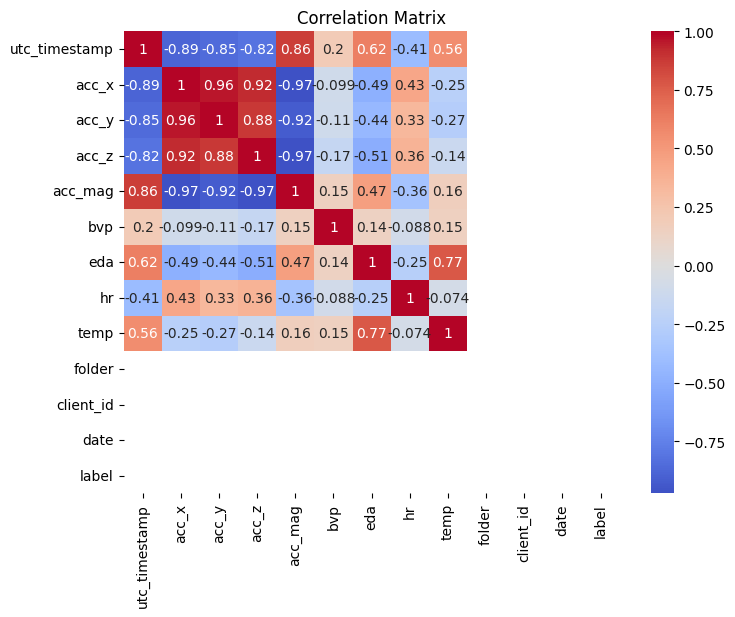

In [10]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

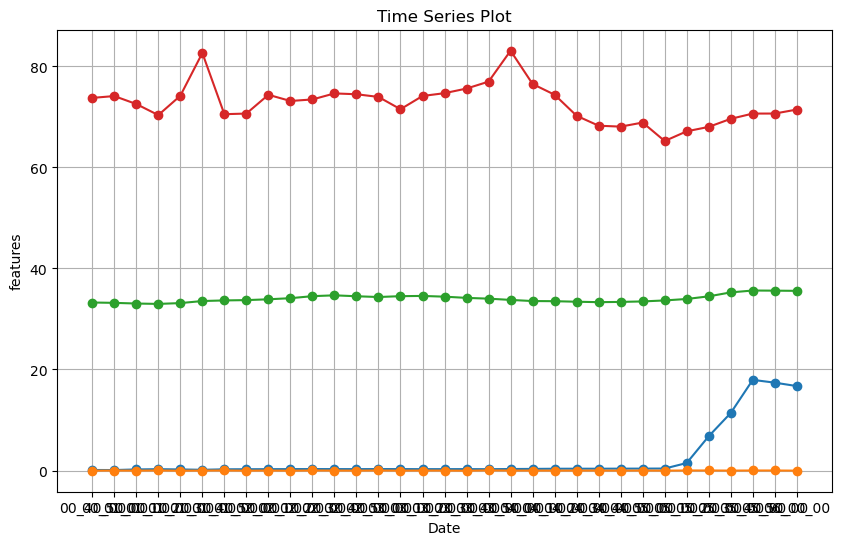

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot multiple features on the same plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the time series data
plt.plot(grouped.index, grouped['eda'], marker='o', linestyle='-')
plt.plot(grouped.index, grouped['bvp'], marker='o', linestyle='-')
plt.plot(grouped.index, grouped['temp'], marker='o', linestyle='-')
plt.plot(grouped.index, grouped['hr'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('features')
plt.title('Time Series Plot')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()



In [ ]:
from multiprocessing import Pool
from FlightSchedule import process_flightsScheduleData
from AuxPrices import process_AuxPrices
import warnings
import logging
warnings.filterwarnings('ignore', message='Unverified HTTPS request')
def parallelize_process_flightsScheduleData(p_routes_df, p_jMinusX_int_list = [],p_numProcessors_int = 10):
    """
    
    """
    print("start parallelize_process_flightsScheduleData for easyjet")
    def ranges(N, nb):
        step = N / nb
        return [(round(step*i), round(step*(i+1))) for i in range(nb)]
    
    if p_numProcessors_int > len(p_routes_df):
        p_numProcessors_int = len(p_routes_df)
    ranges_list = ranges(len(p_routes_df), p_numProcessors_int)
    routeChunks_df_list = [p_routes_df[i:j] for i, j in ranges_list]
    p = Pool(processes = p_numProcessors_int)
    
    p.map(process_flightsScheduleData, routeChunks_df_list)
    print("end parallelize_process_flightsScheduleData for easyjet")
    
    
def parallelize_process_AuxPrices(p_flights_df, 
                        p_jMinusX_int_list = [],
                        p_numProcessors_int = 10):
    """
    
    """
   
    def ranges(N, nb):
        step = N / nb
        return [(round(step*i), round(step*(i+1))) for i in range(nb)]
    if(len(p_flights_df) != 0):
        print("start parallelize_process_AuxPrices for easyjet")
        if p_numProcessors_int > len(p_flights_df):
            p_numProcessors_int = len(p_flights_df)
        ranges_list = ranges(len(p_flights_df), p_numProcessors_int)
        flightChunks_df_list = [p_flights_df[i:j] for i, j in ranges_list]
        p = Pool(processes = p_numProcessors_int)
        p.map(process_AuxPrices, flightChunks_df_list)
        print("end parallelize_process_AuxPrices for easyjet")